In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tqdm import tqdm

import numpy as np
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)



In [2]:
# Load the training dataset
train_data = pd.read_csv('../archive/sign_mnist_train.csv')


In [3]:
# Separate the data (features) and the classes
X_train = train_data.drop(["label"], axis=1)  # Features (all columns except the first one)
X_train = X_train / 255.0
y_train = train_data['label']   # Target (first column)

# Create validation dataset by splitting training data (20% for validation)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


Lambda: 0| Hidden Size: 64| Validation Accuracy: 1.0000| F1-Score: 1.0000
Lambda: 0.0001| Hidden Size: 64| Validation Accuracy: 1.0000| F1-Score: 1.0000
Lambda: 0.001| Hidden Size: 64| Validation Accuracy: 1.0000| F1-Score: 1.0000
Lambda: 0.01| Hidden Size: 64| Validation Accuracy: 0.9998| F1-Score: 0.9998
Lambda: 0.1| Hidden Size: 64| Validation Accuracy: 0.9996| F1-Score: 0.9996


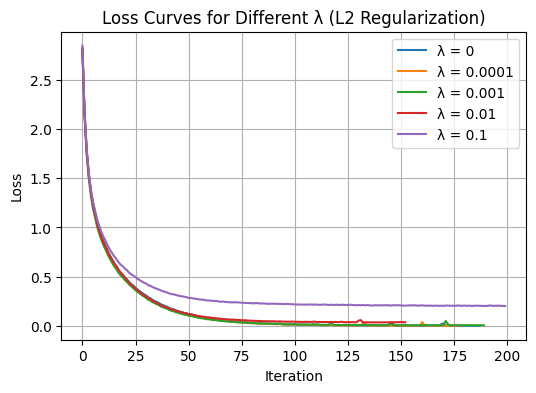

In [4]:
import matplotlib.pyplot as plt

lambda_hyperparameter = [0, 1e-4, 1e-3, 1e-2, 0.1]

val_accs = []
f1_scores = []

plt.figure(figsize=(6,4))  # <-- Create ONE figure

for l in lambda_hyperparameter:

    model = MLPClassifier(
        hidden_layer_sizes=(64),
        activation='relu',
        solver='adam',
        learning_rate_init=0.001,
        alpha=l,
        early_stopping=False,
        n_iter_no_change=15,
        verbose=False,
        random_state=42
    )

    model.fit(X_train, y_train)

    # Record metrics
    val_acc = model.score(X_validate, y_validate)
    f1_score_val = f1_score(y_validate, model.predict(X_validate), average='weighted')
    f1_scores.append(f1_score_val)
    val_accs.append(val_acc)

    print(f'Lambda: {l}| Hidden Size: 64| '
          f'Validation Accuracy: {val_acc:.4f}| F1-Score: {f1_score_val:.4f}')

    # Add curve to same plot
    plt.plot(model.loss_curve_, label=f"λ = {l}")

# Final formatting AFTER loop
plt.title("Loss Curves for Different λ (L2 Regularization)")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()
